<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [1]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
# import tensorflow.keras as keras
keras = tf.keras
import zipfile
import pandas as pd

**Gebruik een <i>environment variable</i> voor het instellen van het loglevel van TensorFlow**

In [2]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data genereren</h3>

In [3]:
riverDirectory = "pics/2750/River"
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    edgeFiles.append(imgFile)
    
highwayDirectory = "pics/2750/Highway"

for filename in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, filename)
    edgeFiles.append(imgFile)

txtFiles = edgeFiles    

print(txtFiles[1])

pics/2750/River\River_10.jpg


<h3>Data filteren</h3>

In [4]:
txtFiles = [x for x in txtFiles if ".jpg" in x]
print(txtFiles[1])

pics/2750/River\River_10.jpg


<h3>Data inlezen</h3>

In [5]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(txtFiles[i])).astype('uint8')/255
  i += 1
    
print(imageObjects[0])    

[[[0.43529412 0.45098039 0.44705882]
  [0.43529412 0.45098039 0.44705882]
  [0.39607843 0.39607843 0.39607843]
  ...
  [0.29411765 0.3372549  0.34509804]
  [0.31372549 0.34901961 0.36862745]
  [0.31764706 0.35294118 0.37254902]]

 [[0.43529412 0.45098039 0.44705882]
  [0.43529412 0.45098039 0.44705882]
  [0.39215686 0.4        0.39607843]
  ...
  [0.29411765 0.3372549  0.34509804]
  [0.30980392 0.34509804 0.36470588]
  [0.31372549 0.34901961 0.36862745]]

 [[0.41960784 0.44313725 0.43529412]
  [0.42352941 0.43921569 0.43529412]
  [0.38431373 0.39215686 0.38823529]
  ...
  [0.29019608 0.34509804 0.35686275]
  [0.30196078 0.34509804 0.36078431]
  [0.30196078 0.34509804 0.36078431]]

 ...

 [[0.18039216 0.26666667 0.32156863]
  [0.18039216 0.26666667 0.32156863]
  [0.18431373 0.25882353 0.31764706]
  ...
  [0.21960784 0.32156863 0.3254902 ]
  [0.22352941 0.31764706 0.3254902 ]
  [0.22745098 0.32156863 0.32941176]]

 [[0.17647059 0.2627451  0.31764706]
  [0.17647059 0.2627451  0.31764706]


**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [6]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.replace("\\", "/").split('/')[2]
    i += 1
    
print(txtFiles[1])    

River


In [7]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))

# print(np.unique(labelNumbers), labelNames)

# print('labelNames: ', labelNames)
# print('labelNumbers: ', labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 2500],
       [   1, 2500]], dtype=int64)

<h3>Data splitten</h3>

In [8]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.6, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)

(3000, 64, 64, 3)


<h3>Data inspecteren</h3>

In [9]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

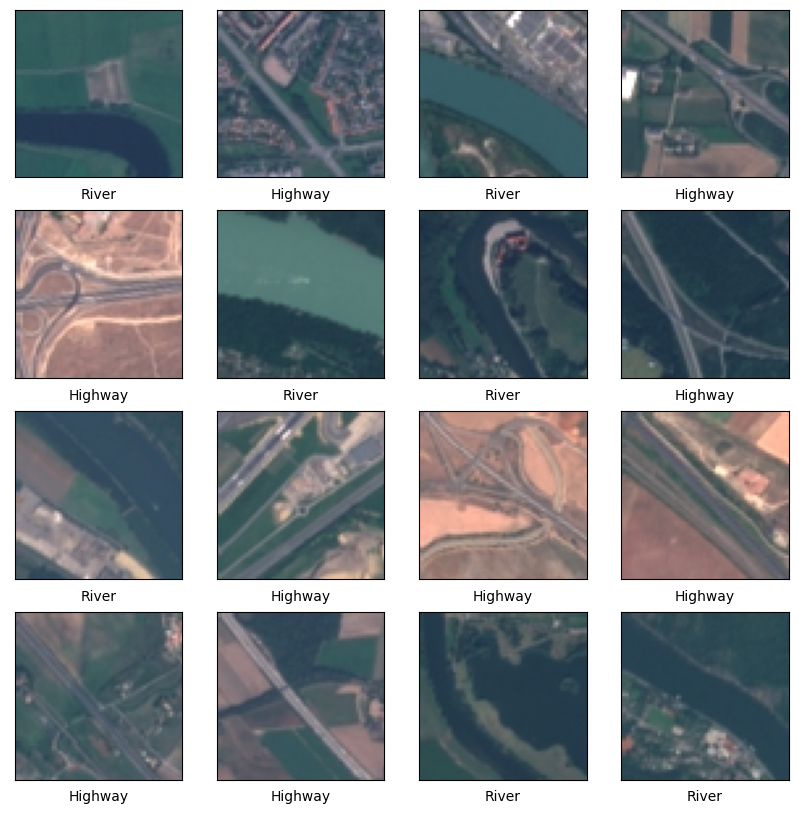

In [10]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [11]:
# batch_size = 64
img_height = 64
img_width = 64

In [12]:
numberNames = len(labelNames)
# print(numberNames)

In [14]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(64, 64, 3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation = 'relu'), 
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(512, activation = 'relu'), 
  tf.keras.layers.Dense(10)
  ])  

<h3>Definieer de trainparameters</h3>

In [15]:
lossFunction = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = tf.keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 10

<h3>Train het model</h3>

In [16]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 64)                786496    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 964,554
Trainable params: 964,554
Non-trai

In [18]:
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2, validation_data=(testSet, testLabels))

Epoch 1/10
47/47 - 2s - loss: 0.8632 - accuracy: 0.5347 - val_loss: 0.6350 - val_accuracy: 0.6355 - 2s/epoch - 46ms/step
Epoch 2/10
47/47 - 0s - loss: 0.6296 - accuracy: 0.6337 - val_loss: 0.6161 - val_accuracy: 0.6235 - 346ms/epoch - 7ms/step
Epoch 3/10
47/47 - 0s - loss: 0.5860 - accuracy: 0.6860 - val_loss: 0.5827 - val_accuracy: 0.6970 - 352ms/epoch - 7ms/step
Epoch 4/10
47/47 - 0s - loss: 0.5702 - accuracy: 0.7067 - val_loss: 0.5823 - val_accuracy: 0.7045 - 341ms/epoch - 7ms/step
Epoch 5/10
47/47 - 0s - loss: 0.5702 - accuracy: 0.7127 - val_loss: 0.5815 - val_accuracy: 0.7010 - 348ms/epoch - 7ms/step
Epoch 6/10
47/47 - 0s - loss: 0.5670 - accuracy: 0.7133 - val_loss: 0.5698 - val_accuracy: 0.7250 - 358ms/epoch - 8ms/step
Epoch 7/10
47/47 - 0s - loss: 0.5696 - accuracy: 0.7127 - val_loss: 0.5794 - val_accuracy: 0.7155 - 355ms/epoch - 8ms/step
Epoch 8/10
47/47 - 0s - loss: 0.5609 - accuracy: 0.7110 - val_loss: 0.5734 - val_accuracy: 0.6965 - 350ms/epoch - 7ms/step
Epoch 9/10
47/47 -

In [19]:
model.save("models_saved/model_2.h5", overwrite=True, include_optimizer=True)

In [20]:
model.predict(testSet)

array([[ 2.653401 ,  3.4305441, -6.150251 , ..., -6.049785 , -6.476965 ,
        -5.882161 ],
       [ 3.6280043,  2.6709208, -7.0910335, ..., -7.2342505, -7.740407 ,
        -6.626977 ],
       [ 3.1856933,  3.0388055, -6.357025 , ..., -6.3961873, -6.9538145,
        -6.0226297],
       ...,
       [ 2.7545345,  3.3070219, -6.1048875, ..., -6.0477886, -6.5129657,
        -5.818613 ],
       [ 3.5103233,  3.8855119, -7.5285163, ..., -7.483727 , -8.148824 ,
        -7.134041 ],
       [ 3.6469676,  3.655848 , -7.4131613, ..., -7.4715037, -8.1011305,
        -7.023492 ]], dtype=float32)

In [21]:
# np.argmax om 

predictionBatch = model.predict(testSet, batch_size=16)
predictionEnhanced = np.argmax(predictionBatch, axis=-1)

print(predictionEnhanced)

# original labels

labels = np.argmax(testLabels,axis=-1)

# from sklearn.metrics import classification_report

# print(classification_report(labels, pred))

conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=predictionEnhanced)

print(conf_matrix)

[1 0 0 ... 1 1 1]
tf.Tensor(
[[774 226]
 [335 665]], shape=(2, 2), dtype=int32)


# <h2>**Test het model**</h2>

<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

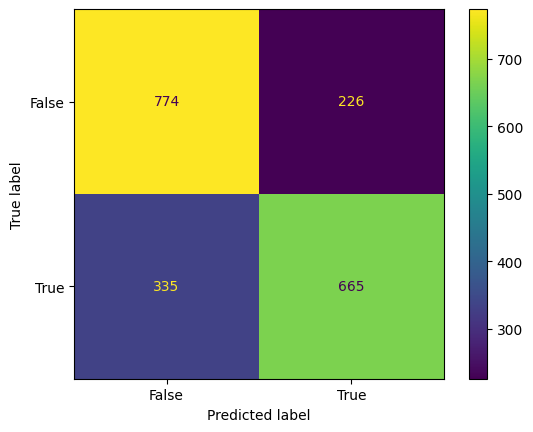

In [22]:
from sklearn import metrics

actual = testLabels
predicted = predictionEnhanced

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [23]:
predictions = predictionEnhanced

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testLabels,predictions))
print(classification_report(testLabels,predictions))

[[774 226]
 [335 665]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.75      0.67      0.70      1000

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



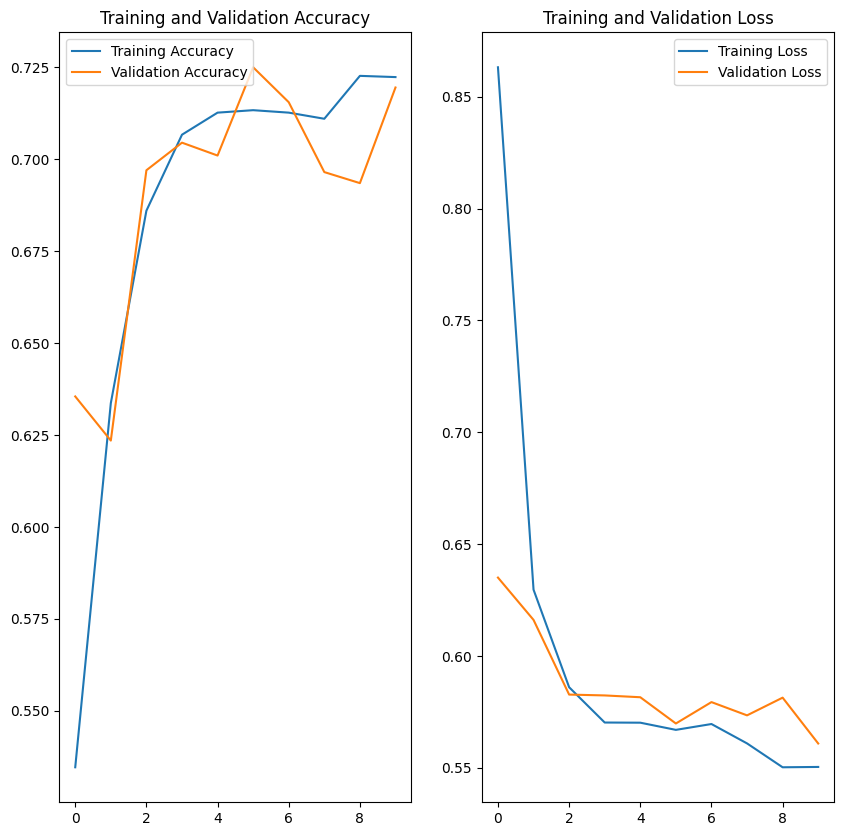

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = nrOfEpochs
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
# landscape_url = "http://www.freeimageslive.co.uk/files/images010/fields_pathwork.preview.jpg"
# landscape_url = "https://wallup.net/wp-content/uploads/2016/01/248765-Earth-landscape-aerial_view-nature.jpg"
# landscape_url = 'https://drive.google.com/file/d/1YuQ-hShFq8-GZuqT1LrCAil_2ogs9gl9/view?usp=sharing'
# landscape_url = "https://www.denarend.com/satellite-sculpture-views/images/dirksland-bridge-02.jpg"
# landscape_url = "https://i0.wp.com/lifeology101.com/wp-content/uploads/2017/08/img_6015-copy.jpg?resize=665%2C443&ssl=1"
# landscape_path = tf.keras.utils.get_file('agricultural_landscape', origin=landscape_url)

# landscape_img = "https://www.denarend.com/satellite-sculpture-views/images/dirksland-bridge-02.jpg"
# landscape_url = "https://i0.wp.com/lifeology101.com/wp-content/uploads/2017/08/img_6015-copy.jpg?resize=665%2C443&ssl=1"
# landscape_path = tf.keras.utils.get_file('agricultural_landscape', origin=landscape_img)


# print(landscape_url)

# img = tf.keras.utils.load_img(
#     landscape_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# img.show()

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(labelNames[np.argmax(score)], 100 * np.max(score))
# )

In [26]:
#hier kies je welke index je iets mee wilt
i = 1000


#dit is het plaatje van index i
img = testSet[i]


# print de label naam van index i
print(labelNames[testLabels[i]])

for i in range(16):

#laat plaatje zien
plt.imshow(img)

predictions = model.predict(img)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labelNames[np.argmax(score)], 100 * np.max(score))
)

IndentationError: expected an indented block after 'for' statement on line 12 (2603460275.py, line 15)